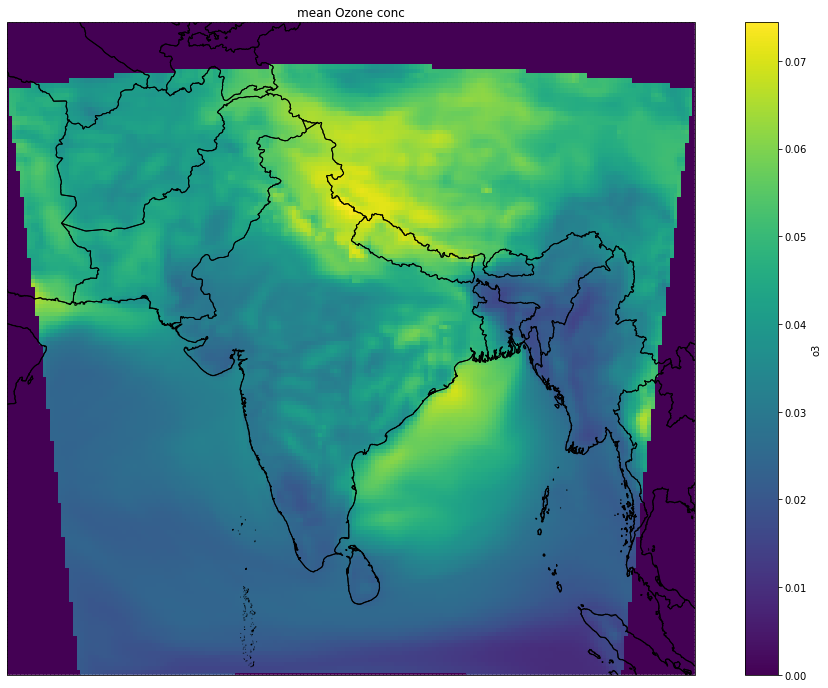

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from ipywidgets import interactive
import matplotlib as mpl    #I probably don't need half of these packages, so I can optimise later
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import matplotlib.collections as col
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import (OCEAN, LAKES, BORDERS, COASTLINE, RIVERS, COLORS,
                             LAND)
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
from wrf import (getvar, to_np, vertcross, smooth2d, CoordPair, GeoBounds,
                 get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import os
import pandas as pd
import glob

data = xr.open_dataset (r'wrfout_d01_global_0.25deg_2016-10_o3.nc')

statesetc = shpreader.natural_earth(resolution='10m',# downloads country borders from Natural Earth
                                      category='cultural',
                                      name='admin_0_countries') #
shape_feature_another = ShapelyFeature(Reader(statesetc).geometries(),
                                ccrs.PlateCarree(), edgecolor='black', facecolor = 'none') #setting the facecolor as none is important, otherwise you can't see what is being plotted 

Ozone_data = data['o3']
o3 = Ozone_data.mean(dim = 'time')

fig = plt.figure (figsize = (18, 12))
ax =plt.axes(projection = ccrs.Mercator()) 
ax.coastlines()

ax.set_extent([57.25,102.75,1.25,38.5]) #I had to manually determine the extent from the WRF data as it had output NaN from the 
#
ax.add_feature(shape_feature_another) 
o3.plot(transform=ccrs.PlateCarree()) 

plt.title ('mean Ozone conc') #I think this is ppm. The .nc file doesn't say
plt.show ()